## Méthodes hiérarchiques

https://fr.wikipedia.org/wiki/Regroupement_hi%C3%A9rarchique

Il fonctionne avec des données décrites par une distance. Il construit des classes emboîtées et peut être repéresenté par une hiérarchie (un arbre).

L'intérêt de ces méthodes est :
* de permettre une classification sans avoir à choisir un nombre de classe
* d'avoir des classes de plus en plus grosse

Une hiérarchie est un ensemble de classes $\mathcal{H}$ tel que pour tous $A, B \in \mathcal{H}$ on a : $A \cap B \in \{ A, B, \phi\}$ (deux classes sont soit disjointes soit emboîtées).

C'est une forme de généralisation d'une partition. C'est également un arbre si on considère l'inclusion : les enfants d'une classe étants les classes strictement plus petite que celle-ci (on appelle cet arbre un *dendregramme*).

## algorithme

* **Entrée** : 
    * un ensemble $X$ de $n$ éléments à classer
    * une distance $d$ entre les éléments
    * une façon de mettre à jour la distance : $f$: $X \times X \rightarrow \mathbb{R}$    
* **Sortie** : Un ensemble de classes formant une hiérarchie

* **Algorithme** :
    * On considère que $\mathcal{H}$ est l'ensemble des singletons formé avec l'ensmelbe des éléments à classer.
    * $\mathcal{C} = \mathcal{H}$
    * la distance entre 2 singletons est la distance entre les deux éléments.
    * répète $n-1$ fois :
        * soient $A$ et $B$ deux éléments de $\mathcal{C}$ ayant une distance minimale
        * on ajoute $A \cup B$ à $\mathcal{C}$ et on supprime $A$ et $B$ de $C$        
        * pour tout $C \in \mathcal{C}$, la distance entre $C$ et $A\cup B$ est $f(C, A\cup B)$

L'algorithme dépend donc d'une fonction $f$ permettant de mettre à jour la distance. Il en existe de nombreuses, qui vont changer l'arbre solution. sklearn ensupporte 4 :
* “ward” : à utiliser pour des données euclidienne : $f(A, B)$ est la perte d'inertie à regrouper $A$ et $B$ $I(A \cup B) - I(A) - I(B)$
* “average” : méthode par défaut. Basée sur des moyennes : $f(A, B) = \frac{1}{|A| * |B|}\sum_{x \in A, y \in B} d(x, y)$
* “complete” : prend la plus grande distance (méthode pssimiste) : $f(A, B) = \max_{x \in A, y \in B} d(x, y)$
* “single” : prend la plus petite distance (méthode optimiste) : $f(A, B) = \min_{x \in A, y \in B} d(x, y)$

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [48]:
import seaborn as sns

sns.set()

iris = sns.load_dataset('iris').drop(columns="species")
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


On a toujours 3 espèces que l'on représentera en 3 clouleurs différentes. Les 50 premières sont de l'espèce *setosa*, les 50 suivantes de l'espèce *versicolor* et les 50 dernière de l'espèce *virginica*

**Attention** : ces 3 espèces sont des *meta* données : ce sont les botanistes qui ont répartis les iris en espèces, ce n'est pas inhérent aux données.

Pour que nos arbres puissent être visibles, on ne va prendre qu'une partie des données, les 10 premières de chaque espèces.

In [49]:
iris = iris[([True] * 10 + [False] * 40) * 3]

iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## Arbre

In [50]:
import sklearn

In [51]:
from sklearn.cluster import AgglomerativeClustering

Par défaut, l'algorithme ne calcule que 2 classes (sk-learn est une bibliothèque de machine learning et ils ne savent compter que jusqu'à 2... POur répondre toujours à la question OUI/NON). Nous on veut tout l'arbre.

In [52]:
# iris, on utilise ward
# par défaut, la distance euclidienne est utilisée.

clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(iris)

### Noeuds

Chaque nœud crée a 2 enfants, les nœuds qui ont été agrégés  :

In [53]:

clustering.children_

array([[ 0,  4],
       [ 1,  9],
       [ 7, 30],
       [14, 18],
       [ 2,  3],
       [10, 12],
       [11, 16],
       [ 6, 34],
       [ 8, 37],
       [23, 24],
       [13, 19],
       [25, 27],
       [31, 38],
       [33, 36],
       [28, 39],
       [22, 29],
       [ 5, 32],
       [15, 40],
       [35, 43],
       [26, 47],
       [20, 45],
       [21, 44],
       [17, 49],
       [41, 50],
       [42, 46],
       [51, 53],
       [48, 55],
       [52, 56],
       [54, 57]])

Nos données initiales sont les plus petits nœuds (ici les nœuds d'index 0 à 29). Puis chaque nœud crée va avoir un numéro plus grand. 

Le 1er nœud crée (qui est l'agrégation des nœuds 0 et 4) va ainsi avoir l'index 30.

In [54]:
# 1er noeud crée a lié les 2 noeuds : 
clustering.children_[0]

array([0, 4])

In [55]:
# le noeud crée à la 12ème itération a lié les noeud : 
clustering.children_[11]

array([25, 27])

Comme on aggrège à chaque fois 2 classes, le nombre d'itération est égale à 29 (le nombre d'élément moins 1) :

In [56]:
len(clustering.children_)

29

### Hauteur d'agrégation

La hauteur d'arégation de chaque classe pour chaque itération :

In [57]:
clustering.distances_

array([ 0.14142136,  0.17320508,  0.21602469,  0.24494897,  0.24494897,
        0.26457513,  0.26457513,  0.31622777,  0.5       ,  0.5       ,
        0.51961524,  0.52915026,  0.57445626,  0.6670832 ,  0.67577116,
        0.75498344,  0.77995726,  0.83066239,  0.8953584 ,  0.9486833 ,
        1.0082989 ,  1.16332856,  1.41279864,  1.41891978,  1.4501724 ,
        2.30024153,  3.74729532,  5.8080978 , 15.34672604])

In [58]:
# hauteur de la première itération : 
clustering.distances_[0]

0.1414213562373093

In [59]:
# hauteur de la 12 itérations itération : 
clustering.distances_[11]

0.5291502622129179

La hauteur va souvent avoir une courbe *exponentielle* :

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

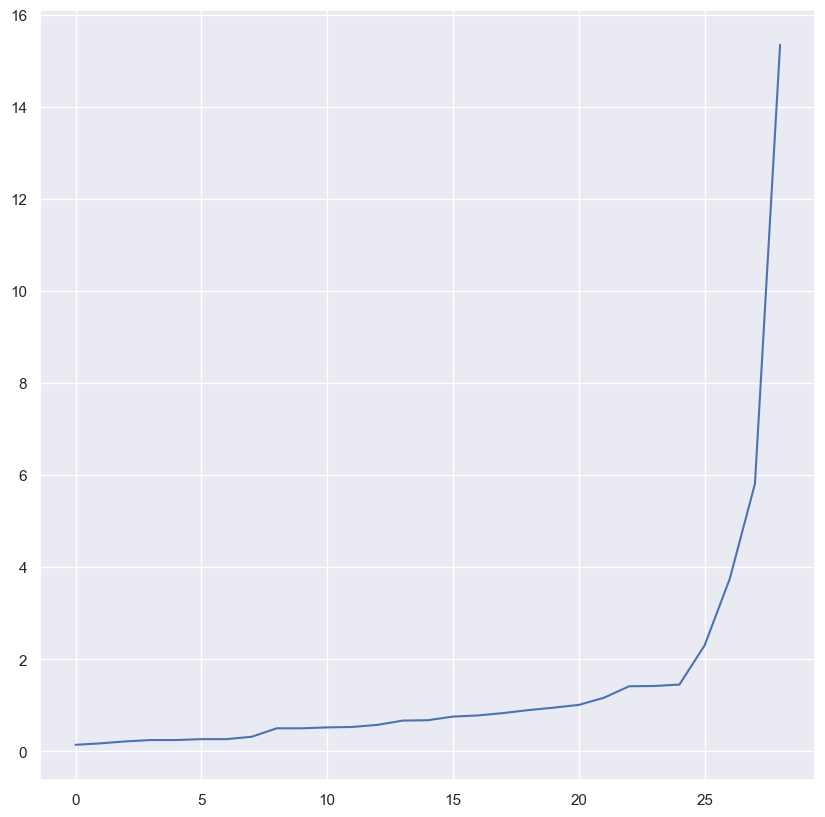

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.lineplot(x=list(range(len(clustering.distances_))), 
                y=clustering.distances_, 
                legend=False,
                ax=ax)

plt.show()

### Représentation graphique

Pour dessiner l'arbre (qu'on appelle dendrogramme), on a besoin des coordonnées de chaque nœud. On peut se restreindre aux coordonnées sur l'axe des abcisse des élémentsde départ.

In [62]:
import pandas

In [63]:
fils = clustering.children_
hauteur = clustering.distances_
n = len(clustering.labels_)


node_position = pandas.DataFrame([(0, 0) for i in range(n)], 
                             columns=['x', 'y'])

node_position 

pos = [0]
def backtracking(noeud):
    for x in noeud:
        if x < n:
            node_position.loc[x , 'x'] = pos[0]
            pos[0] += 1
        else:
            backtracking(fils[x - n])

backtracking(fils[-1])

for i, (son1, son2) in enumerate(fils):
    pos = 0.5 * (node_position.loc[son1]['x'] + node_position.loc[son2]['x'])
    node_position = pandas.concat([node_position, pandas.DataFrame([(pos, hauteur[i])], columns=['x', 'y'])], ignore_index=True)
    
node_position

,x,y
0,8.00000,0.000000
1,0.00000,0.000000
2,4.00000,0.000000
3,5.00000,0.000000
4,9.00000,0.000000
5,6.00000,0.000000
6,3.00000,0.000000
7,7.00000,0.000000
8,2.00000,0.000000
9,1.00000,0.000000


In [64]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

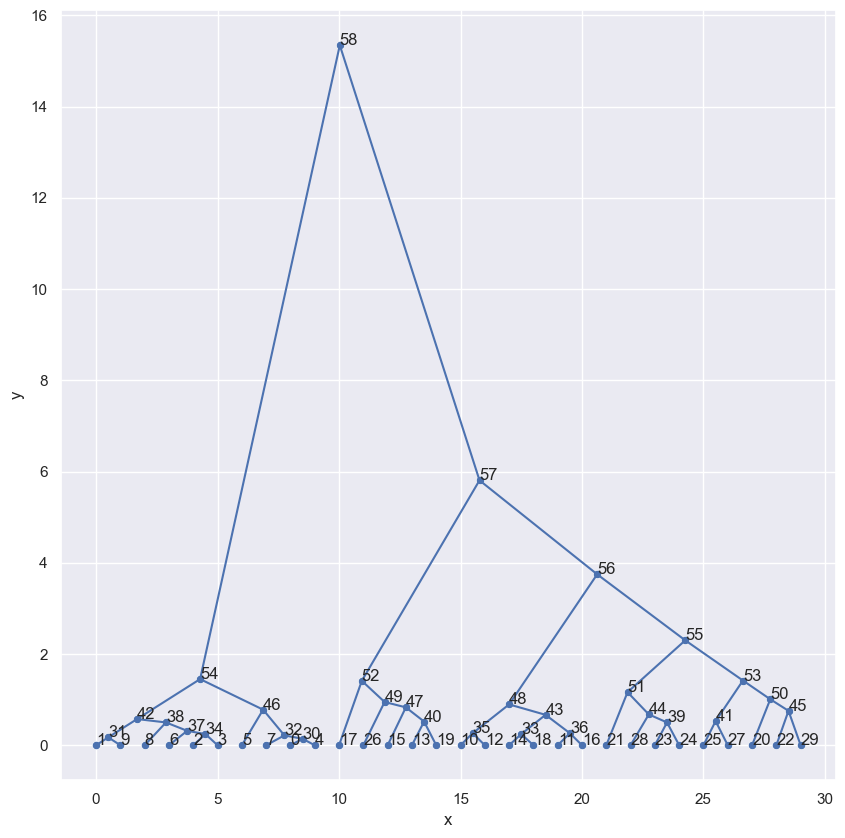

In [65]:
n = len(clustering.labels_)

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=node_position,
                legend=False,
                ax=ax)

for i, sons in enumerate(fils):
    u = node_position.loc[i + n]    
    v1 = node_position.loc[sons[0]]
    v2 = node_position.loc[sons[1]]
    
    l = mlines.Line2D([u['x'], v1['x']] , [u['y'], v1['y']])
    ax.add_line(l)
    l = mlines.Line2D([u['x'], v2['x']] , [u['y'], v2['y']])
    ax.add_line(l)


for i, row in node_position.iterrows():
    ax.text(row['x'], row['y'], i)
    
plt.show()

On voit bien quele 1er nœud crée est d'index 30 et à agrégé les nœuds 0 et 4 à une hauteur de .14

Le noeud crée à la 12 itération est d'index 29 + 12 = 41.

On peut améliorer le dessin en ne légendant que les données de départ. Pour cela, on va créer un dictionnaire de correspondance entre le nœud de l'arbre et son label.

On crée le dictionnaire en itérant sur les lignes du dataframe (`iris.iterrows()`). Cette itération rend à chaque passage un couple `(index, row)` le premier correspondant à l'index (le nom) de la linge et le secon à la ligne proprement dite.

Ceci ne suffit pas pour nous, puisqu'il nous faut également lenuméro de la ligne (qui est différent de l'index). Pour cela on utilise [une technique de bouble](https://docs.python.org/fr/3.5/tutorial/datastructures.html#looping-techniques) avec `enumerate`.



In [66]:
data = iris

labels = dict()

for i, (index, row) in enumerate(iris.iterrows()):
    labels[i] = index

labels

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 50,
 11: 51,
 12: 52,
 13: 53,
 14: 54,
 15: 55,
 16: 56,
 17: 57,
 18: 58,
 19: 59,
 20: 100,
 21: 101,
 22: 102,
 23: 103,
 24: 104,
 25: 105,
 26: 106,
 27: 107,
 28: 108,
 29: 109}

On a alors le dessin suivant :

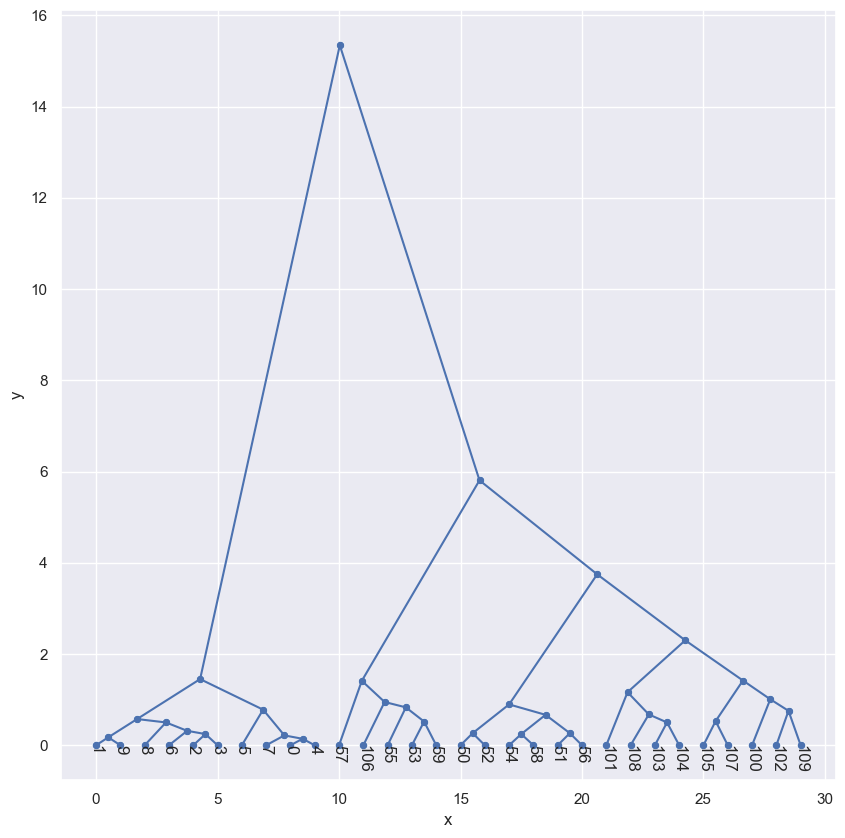

In [67]:
# données : 
# - clustering : issu de AgglomerativeClustering 
# - node_position : dataframe contenant la postion des différents nœuds du clustering (voir au-dessus pour son calcul)
# - labels : le label des nœuds

n = len(clustering.labels_)

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=node_position,
                legend=False,
                ax=ax)

for i, sons in enumerate(fils):
    u = node_position.loc[i + n]    
    v1 = node_position.loc[sons[0]]
    v2 = node_position.loc[sons[1]]
    
    l = mlines.Line2D([u['x'], v1['x']] , [u['y'], v1['y']])
    ax.add_line(l)
    l = mlines.Line2D([u['x'], v2['x']] , [u['y'], v2['y']])
    ax.add_line(l)


for i, row in node_position.iterrows():
    if i in labels:
        ax.text(row['x'], row['y'], labels.get(i, i), 
                horizontalalignment='center',
                verticalalignment='top', 
               rotation=-90)
    
plt.show()

On voit que les espèces sont bien conservées par les classes (de 0 à 9, de 50 à 59 et de 100 à 19).

## CAH comme une méthode de partitionnement

On utilise cette méthode d partitionnement plutôt que la méthode des $k$-means si :
* on a des formes non ronde de classes à trouver (après une isomap par exemple) :https://scikit-learn.org/stable/modules/clustering.html
* nos données sont décrites par une distance non euclidienne

**Attention** : on perd la notion d'inertie, il est donc impossible de déterminer *a priori* si une partition est meilleure qu'une autre. Il faut se créer sa propre *fonction objectif* pour déterminer la meilleure partition.

On peut utiliser notre méthode hiérarchique pour trouver une partition de de façon différente :
- on arrète l'algorithme lorqu'il n'y a plus que $k$ classes (si on veut tout l'arbre on vueut qu'il ne reste plus qu'une seule classe)
- on fixe une hauter et on coupe la hiérarchie à cette hauteur.


###  nombre de classe fixé

`sklearn` permet de faire ça grace au paramètre `n_clusters`

Si on fixe le nombre de classes à 4, on arête l'algorithme de la CAH lorsqu'il ne reste que 4 classes (ce sera les classes d'index 54, 42, 48 et 55 de notre arbre complet).

In [68]:
clustering = AgglomerativeClustering(n_clusters=4).fit(iris)

On retrouve les classes dans l'attribut `labels_` :

In [69]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0])

Il y en a bien 4. On peut maintenant regarder leurs adéquation aux espèces d'iris : 

In [70]:
clustering.labels_[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [71]:
clustering.labels_[10:20]

array([3, 3, 3, 2, 3, 2, 3, 2, 3, 2])

In [72]:
clustering.labels_[20:]

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

### coupe à une hauter donnée

On commence par créer tout l'arbre, puis on regarde les hauteurs d'aggrégation.

Une fois la hauteur de coupe déterminée (juste avant la montée exponentielle si elle existe), on ré-exécute la classification avec ce paramètre. Ceci nous donnera les classes conservées.

In [73]:
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(iris)

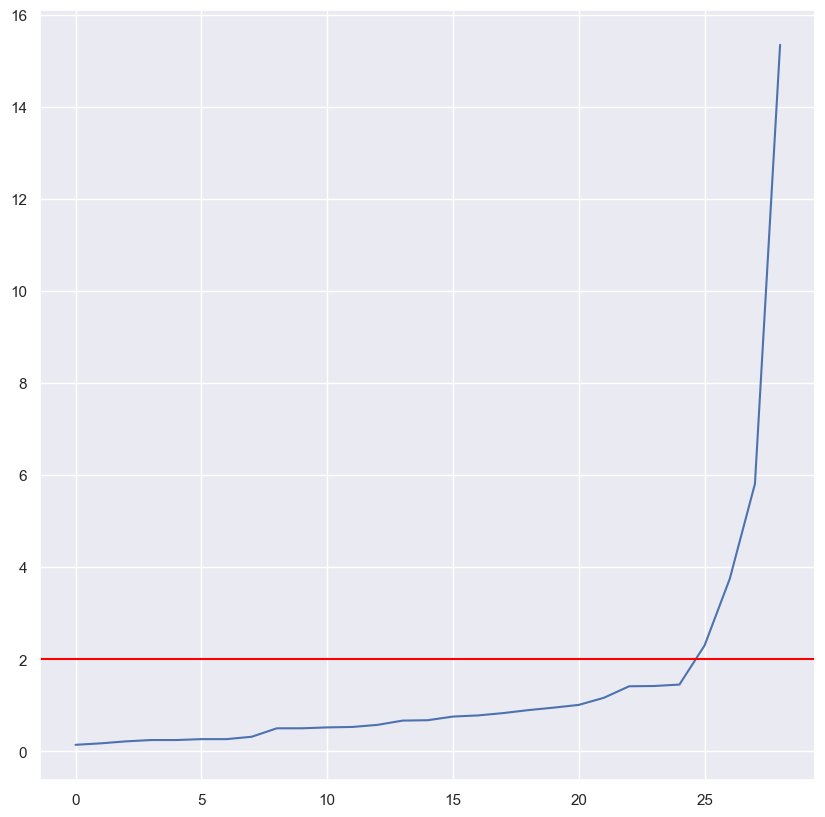

In [74]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.lineplot(x=list(range(len(clustering.distances_))), 
                y=clustering.distances_, 
                legend=False,
                ax=ax)

plt.axhline(2, color="red")


plt.show()

On va couper à 2.

In [75]:
partition = AgglomerativeClustering(n_clusters=None,
                                    compute_full_tree=True,
                                    distance_threshold=2
                                   ).fit(iris)

In [76]:
partition.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 1, 4,
       1, 4, 4, 1, 2, 1, 4, 1])

In [77]:
partition.labels_[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
partition.labels_[10:20]

array([3, 3, 3, 2, 3, 2, 3, 2, 3, 2])

In [79]:
partition.labels_[20:]

array([1, 4, 1, 4, 4, 1, 2, 1, 4, 1])

## comme méthode d'organisation


Permet d'organiser une matrice en éléments similaires. On fait une hiérarchie sur les ligne et le colonne puis on réordonne la matrice avec les hirarchies obtenues. 

Seaborn le fait tout seul pour nous :
https://seaborn.pydata.org/examples/structured_heatmap.html

Idéal pour une matrice de corrélation par exemple.

## Toutes les iris

Refaisons nos algorithmes avec toutes les iris en tentant de trouver une bonne partition.

In [80]:
iris = sns.load_dataset('iris').drop(columns="species")
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Arbre complet

In [81]:
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(iris)

In [82]:
fils = clustering.children_
hauteur = clustering.distances_
n = len(clustering.labels_)


node_position = pandas.DataFrame([(0, 0) for i in range(n)], 
                             columns=['x', 'y'])

node_position 

pos = [0]
def backtracking(noeud):
    for x in noeud:
        if x < n:
            node_position.loc[x , 'x'] = pos[0]
            pos[0] += 1
        else:
            backtracking(fils[x - n])

backtracking(fils[-1])

for i, (son1, son2) in enumerate(fils):
    pos = 0.5 * (node_position.loc[son1]['x'] + node_position.loc[son2]['x'])
    node_position = pandas.concat([node_position, pandas.DataFrame([(pos, hauteur[i])], columns=['x', 'y'])], ignore_index=True)
node_position

,x,y
0,29.000000,0.000000
1,2.000000,0.000000
2,8.000000,0.000000
3,9.000000,0.000000
4,21.000000,0.000000
...,...,...
294,22.992188,3.828053
295,69.187500,4.847709
296,109.498047,6.399407
297,89.342773,12.300396


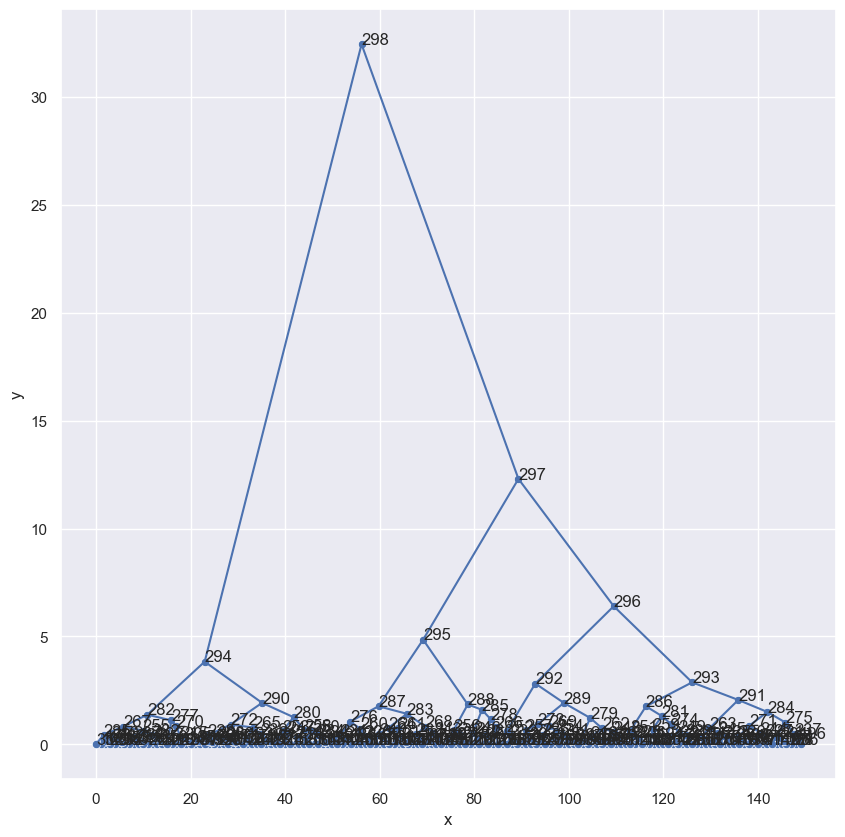

In [83]:
n = len(clustering.labels_)

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=node_position,
                legend=False,
                ax=ax)

for i, sons in enumerate(fils):
    u = node_position.loc[i + n]    
    v1 = node_position.loc[sons[0]]
    v2 = node_position.loc[sons[1]]
    
    l = mlines.Line2D([u['x'], v1['x']] , [u['y'], v1['y']])
    ax.add_line(l)
    l = mlines.Line2D([u['x'], v2['x']] , [u['y'], v2['y']])
    ax.add_line(l)


for i, row in node_position.iterrows():
    ax.text(row['x'], row['y'], i)
    
plt.show()

### coupe à hauteur donnée

In [84]:
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(iris)

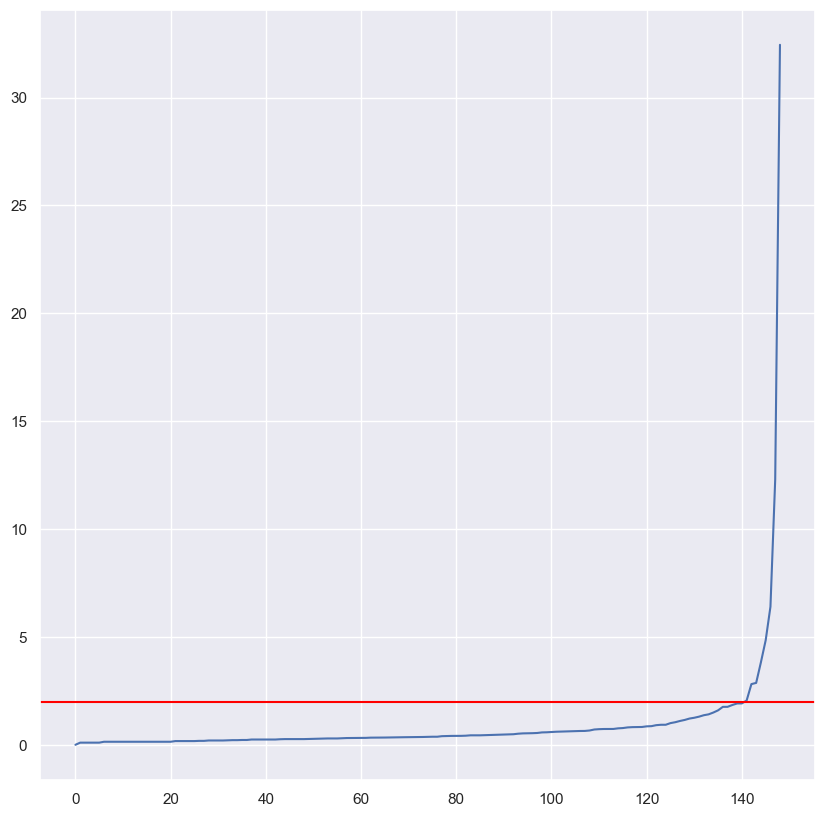

In [85]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.lineplot(x=list(range(len(clustering.distances_))), 
                y=clustering.distances_, 
                legend=False,
                ax=ax)

plt.axhline(2, color="red")


plt.show()

On coupe toujours à une hauteur de 2

In [86]:
partition = AgglomerativeClustering(n_clusters=None,
                                    compute_full_tree=True,
                                    distance_threshold=2
                                   ).fit(iris)

Il y a 9 classes :

In [87]:
max(partition.labels_)

8

Ces classes sont très homogènes avec les 3 espèces d'iris. On peut le remarquer en intersectant les classes :

In [88]:
set(partition.labels_[:50]).intersection(partition.labels_[50:100])

set()

In [89]:
set(partition.labels_[:50]).intersection(partition.labels_[100:])

set()

In [90]:
set(partition.labels_[50:100]).intersection(partition.labels_[100:])

{1, 2, 4, 6}

Comptons le nombre d'éléments par classes

In [91]:
from collections import Counter

Counter(partition.labels_)

Counter({0: 29, 5: 21, 8: 8, 6: 15, 1: 22, 7: 4, 2: 15, 4: 24, 3: 12})

Pour chaque éspèce :

In [92]:
Counter(partition.labels_[:50])

Counter({0: 29, 5: 21})

In [93]:
Counter(partition.labels_[50:100])

Counter({8: 8, 6: 12, 1: 21, 7: 4, 2: 4, 4: 1})

In [94]:
Counter(partition.labels_[100:])

Counter({4: 23, 2: 11, 3: 12, 1: 1, 6: 3})